### Define PPM

In [1]:
from src.PPM import ppm
import numpy as np

# Define link lengths and create PPM
A_link,B_link,C_link,D_link = 25.15,38,76,58.25
Rr = 1
PPM = ppm.mechanism(A=A_link,B=B_link,C=C_link,D=D_link)

# Define function for adding noise to PPM
def add_noise(PPM,sigma):
    A = A_link + np.random.normal(scale=sigma,size=2)
    B = B_link + np.random.normal(scale=sigma,size=6)
    C = C_link + np.random.normal(scale=sigma,size=3)
    D = D_link + np.random.normal(scale=sigma,size=2)
    PPM.update_links(Rr = 1,A_links=A,B_links=B,C_links=C,D_links=D)


### Sweep of P_error (100*sigma/L_char)

In [13]:
Error_in = np.linspace(0,1,10) # (100*sigma/L_char)
Theta_max_sweep = np.linspace(5,25,10) # Configuration Space (rad)
R_workspace = np.zeros(np.size(Theta_max_sweep))
Error_out = np.zeros([10,10]) # Output error
samples = 10

for i,e in enumerate(Error_in):
    for j,theta in enumerate(Theta_max_sweep):
        E = []
        for n in range(samples):
            try:
                PPM.theta_max = np.deg2rad(theta)
                sigma = (e/100)*PPM.L_char
                add_noise(PPM,sigma)
                e_out,w = PPM.find_surface()
                E.append(e_out)
                if i == 0: R_workspace[j] = w
            except:
                print("Invalid:",sigma,theta)
        Error_out[i][j] = np.mean(E)   


Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 5.0
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 7.222222222222222
Invalid: 0.8612326044000002 9.444444444444445
Invalid: 0.8612326044000002 9.444444444444445
Invalid: 0.8612326044000002 9.444444444444445
Invalid: 0.8612326044000002 9.444444444444445
Invalid: 0.8612326044000002 9.444444

c:\Users\Kuba\Documents\Code\ppm-analysis\env\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Kuba\Documents\Code\ppm-analysis\env\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


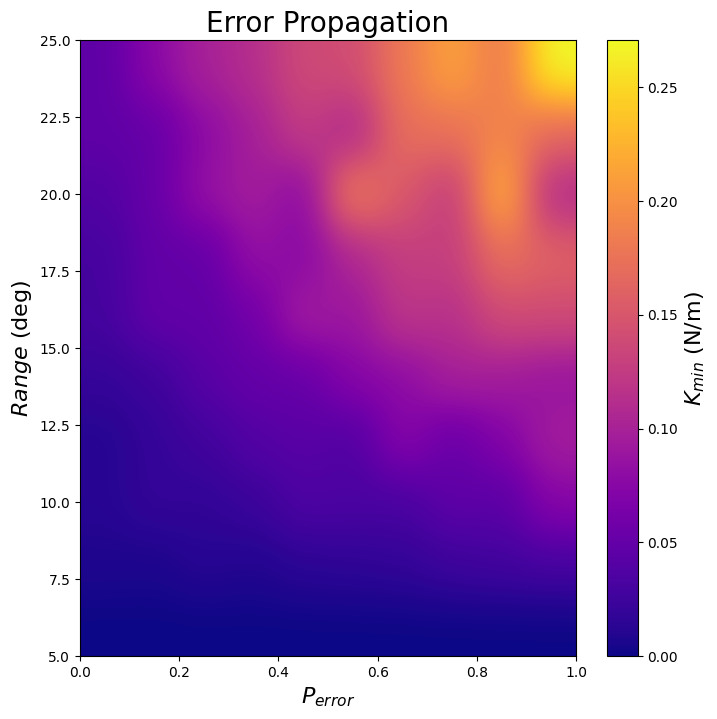

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00736085 0.00628761 0.01231753 0.0092879  0.01476643 0.01622357
  0.01856616 0.02494983 0.02784398 0.03110259]
 [0.01203736 0.01947522 0.01718297 0.02288345 0.03594246 0.03395621
  0.03178729 0.04685861 0.04281291 0.07492561]
 [0.01105647 0.01921331 0.02669565 0.03903451 0.04278524 0.03634408
  0.07544641 0.05176017 0.07033593 0.0961002 ]
 [0.01958577 0.0243653  0.04225366 0.05019421 0.0509187  0.0744317
  0.07789022 0.09897024 0.09450566 0.08639334]
 [0.02934302 0.04934355 0.04755573 0.05852637 0.09630238 0.08794408
  0.12053343 0.11344405 0.13990805 0.13905036]
 [0.02984599 0.04901226 0.04852247 0.08424093 0.07564091 0.1055259
  0.12743708 0.12782606 0.17198277 0.16066414]
 [0.03806491 0.05202949 0.08502074 0.096701   0.07609204 0.18689407
  0.15150009 0.12368248 0.22740935 0.10829062]
 [0.04688199 0.05056393 0.0777807  0.09736632 0.12668867 0.10296362
  0.17259492 0.1732107

In [11]:
import matplotlib.pyplot as plt
plt.imshow(Error_out,cmap="plasma",interpolation="gaussian",origin="lower",aspect="auto",extent=(0,1,5,25))
cb = plt.colorbar()
cb.set_label("$K_{min}$ (N/m)",fontsize=16)
#cb.formatter.set_powerlimits((0, 0))
plt.xlabel("$P_{error}$",fontsize=16)
plt.ylabel("$Range$ (deg)",fontsize=16)
plt.title("Error Propagation",fontsize = 20)
fig = plt.gcf()
fig.set_size_inches((8,8))
plt.show()

print(Error_out)